develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [3]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

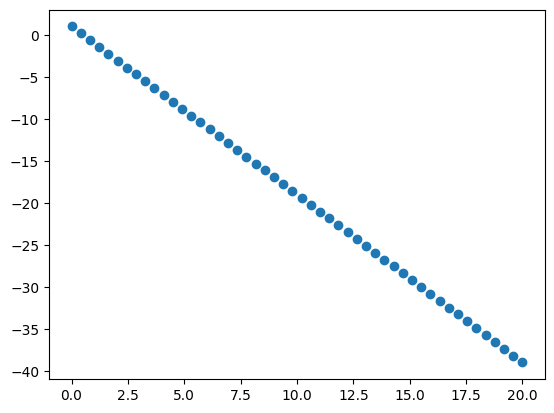

In [4]:
plt.plot(X,y,'o')

#### create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1

In [5]:
def single_variable_GD(x,y,learning_rate,iterations):
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = []

    theta_0 = 0
    theta_1 = 0
    for i in range(iterations):
        h_x = theta_0 + theta_1 * x
        error = h_x - y
        j = 1/(2*len(x)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss.append(j)
        h_xs.append(h_x)
        d_theta_0 = (1/len(x)) * np.sum(error)
        d_theta_1 = (1/len(x)) * np.sum(error * x)
        gradient_vector = np.array([[d_theta_0],[d_theta_1]])
        print("****************** Iteration ",i,"******************")
        print("h(x):",h_x,"\n")
        print("Error Vector:\n",error)
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)

        if (np.linalg.norm(gradient_vector) < 0.001 or abs(loss[i-1]-j) < 0.001) and i != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",i," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Error Vector:\n",error)
            print("Cost = ",j,"\n")
            print("h(x) = y_predict:\n",h_x,"\n")
            print("y_actual:",y,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x
        
        theta_0 = theta_0 - learning_rate * d_theta_0
        theta_1 = theta_1 - learning_rate * d_theta_1
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x = single_variable_GD(X,y,0.0005,300)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j = 249.88775510204087 

Gradient Vector:
 [[ 19.       ]
 [259.3877551]] 

Gradiant Vector Norm:
 260.08269357432516 

theta_0_new: 0
theta_1_new: 0
*************

#### Calculate r2 score

In [7]:
from sklearn.metrics import r2_score

In [8]:
print("r2_score:",r2_score(y,h_x))

r2_score: 0.9975395965150151


#### Plot loss vs. epochs

In [9]:
def loss_plot(loss,color):
    plt.plot(loss,marker='o',color=color)
    plt.grid(True)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()

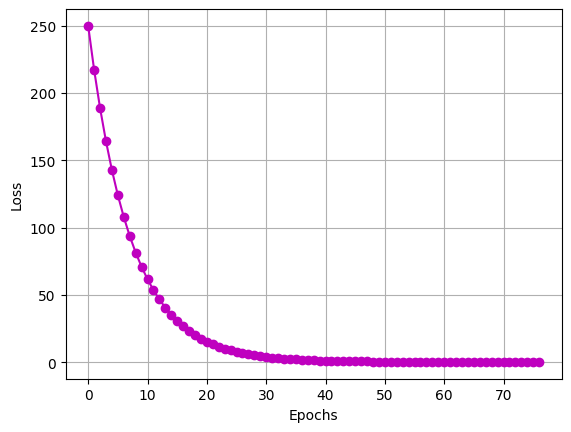

In [10]:
loss_plot(loss,'m')

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [11]:
def theta_plot(thetas,loss,number,r,color):
    plt.plot(thetas,loss,marker='o',color=color)
    plt.grid(True)
    plt.title(f"Learning Rate = {r}")
    plt.ylabel("Loss")
    plt.xlabel(f"Theta {number}")
    plt.show()

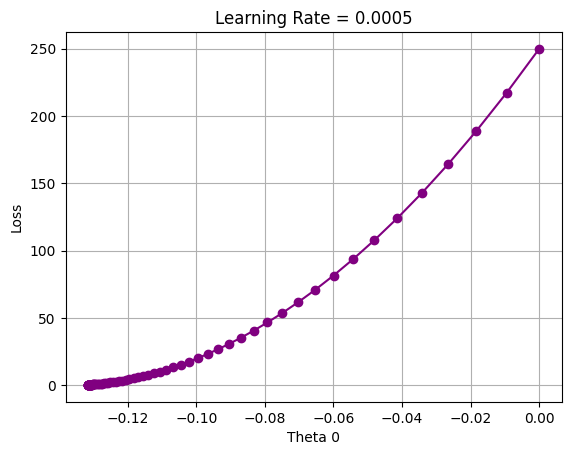

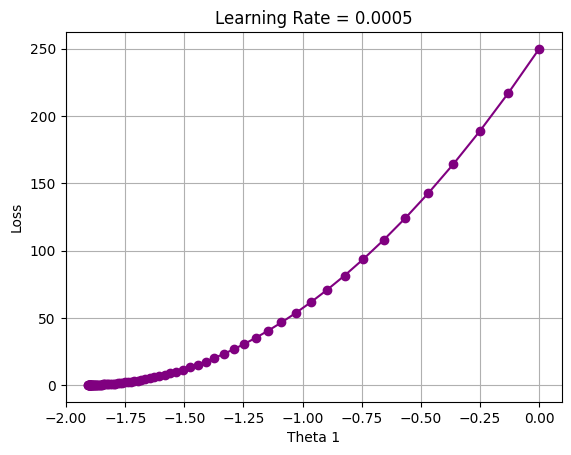

In [12]:
theta_plot(thetas_0,loss,0,'0.0005','purple')
theta_plot(thetas_1,loss,1,'0.0005','purple')

#### Plot all regression lines till converge

In [13]:
def converge_lines(x,y,h_xs,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    for i in range(len(h_xs)):
        plt.plot(x,h_xs[i],color=line_color)
        plt.grid(True)
        plt.xlabel("X")
        plt.ylabel("Y")
    plt.show()

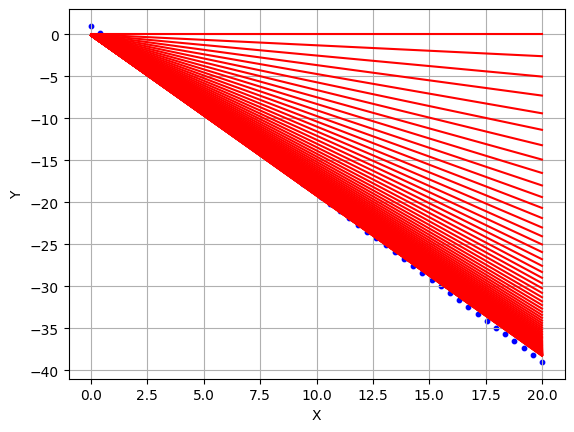

In [14]:
converge_lines(X,y,h_xs,'b','r')

#### Plot the best regression line

In [15]:
def regression_line(x,y,h_x,point_color,line_color):
    plt.scatter(x,y,color=point_color,s=10)
    plt.plot(x,h_x,color=line_color)
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

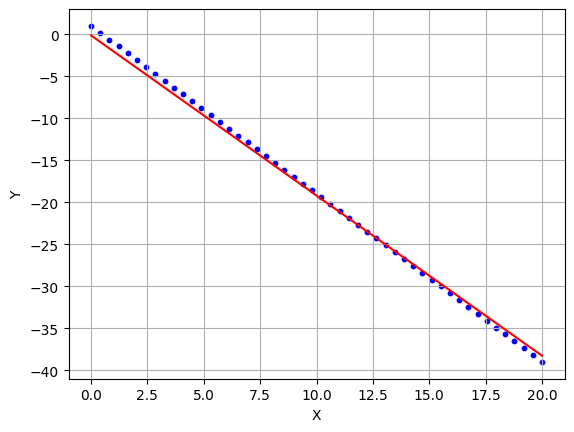

In [16]:
regression_line(X,y,h_x,'b','r')

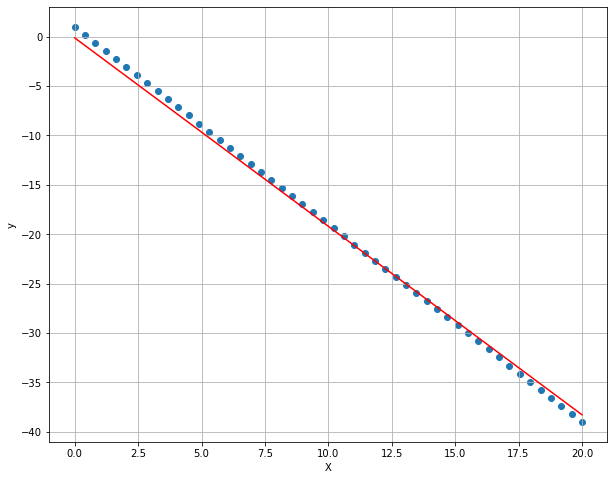

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [17]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x = single_variable_GD(X,y,0.00005,1000)

****************** Iteration  0 ******************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector:
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j = 249.88775510204087 

Gradient Vector:
 [[ 19.       ]
 [259.3877551]] 

Gradiant Vector Norm:
 260.08269357432516 

theta_0_new: 0
theta_1_new: 0
*************

In [18]:
print("r2_score:",r2_score(y,h_x))

r2_score: 0.9965793400861428


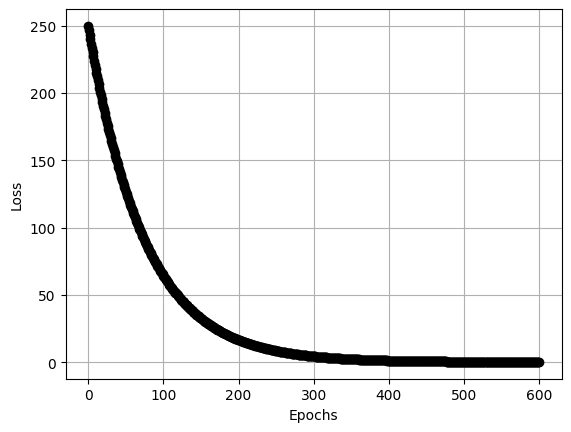

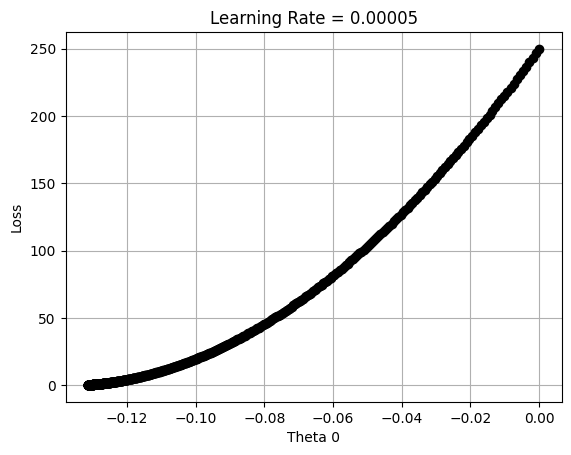

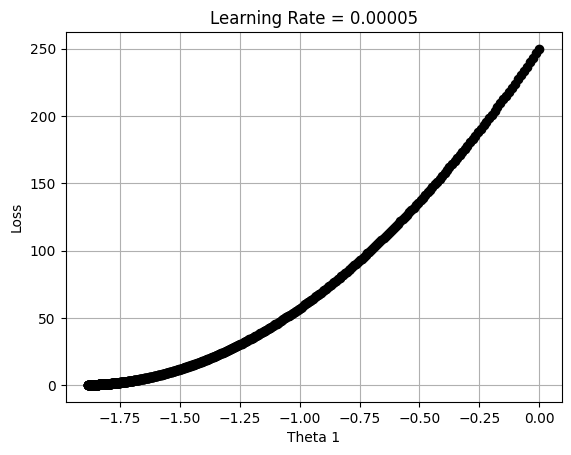

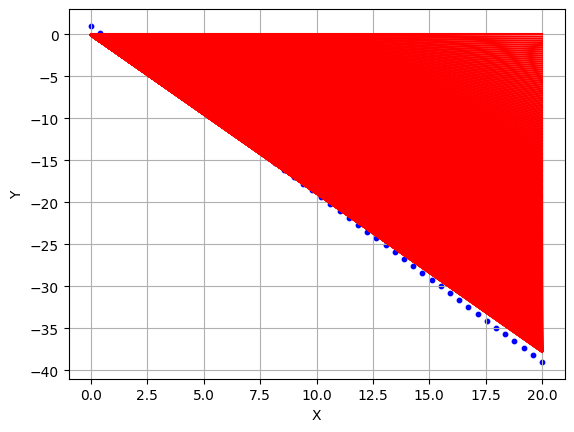

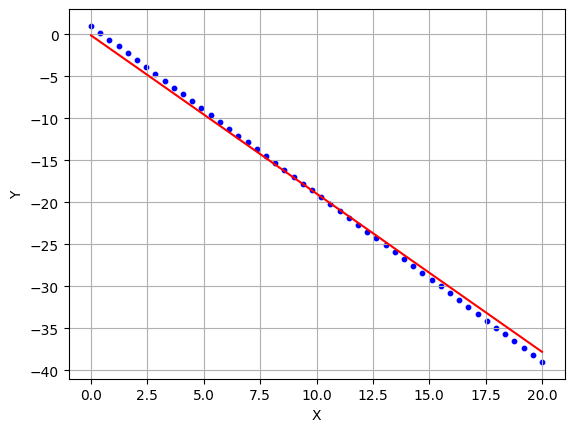

In [19]:
loss_plot(loss,'black')
theta_plot(thetas_0,loss,0,'0.00005','black')
theta_plot(thetas_1,loss,1,'0.00005','black')
converge_lines(X,y,h_xs,'b','red')
regression_line(X,y,h_x,'b','red')

## Stochastic GD

In [29]:
def single_variable_SGD(x,y,learning_rate,epochs):
    np.random.seed(101)
    data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(data)
    x_shuffled = data[:,0]
    y_shuffled = data[:,1]
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = np.zeros(len(x_shuffled))

    theta_0 = 0
    theta_1 = 0

    m = len(x_shuffled)
    print(m)
    for ep in range(epochs):
        for i in range(0,m):
            h_x = theta_0 + theta_1 * x_shuffled[i]
            error = h_x - y_shuffled[i]
            j = 1/2 * error**2
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            loss.append(j)
            d_theta_0 = error
            d_theta_1 = error * x_shuffled[i]
            gradient_vector = np.array([[d_theta_0],[d_theta_1]])
            h_xs = theta_0 + theta_1 * x_shuffled
            theta_0 = theta_0 - learning_rate * d_theta_0
            theta_1 = theta_1 - learning_rate * d_theta_1

        print("****************** Epoch ",ep,"******************")
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        if np.linalg.norm(gradient_vector) < 0.001 or abs(loss[(ep*m)-1]-j) < 0.001 and ep != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",ep," epochs\n")
            print("Cost = ",j,"\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [30]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled = single_variable_SGD(X,y,0.0005,300)

50
****************** Epoch  0 ******************
j = 0.25209950460007696 

Gradient Vector:
 [[0.71006972]
 [8.98455566]] 

Gradiant Vector Norm:
 9.012571185993627 

theta_0_new: -0.12761222125212127
theta_1_new: -1.8592841835063174
****************** Epoch  1 ******************
j = 0.00017746175474585356 

Gradient Vector:
 [[0.01883941]
 [0.23837626]] 

Gradiant Vector Norm:
 0.23911955711901475 

theta_0_new: -0.12397684636948911
theta_1_new: -1.909800583000258
****************** Epoch  2 ******************
j = 3.587899143823388e-08 

Gradient Vector:
 [[0.00026788]
 [0.00338946]] 

Gradiant Vector Norm:
 0.0034000305958517907 

theta_0_new: -0.1168602386254817
theta_1_new: -1.9117125478064034
****************** Training Report ******************

Gradient Descent converged after  2  epochs

Cost =  3.587899143823388e-08 

theta_0_Opt: -0.1168602386254817
theta_1_Opt: -1.9117125478064034 



In [31]:
print("r2_score:",r2_score(y_shuffled,h_xs))

r2_score: 0.9976567971049898


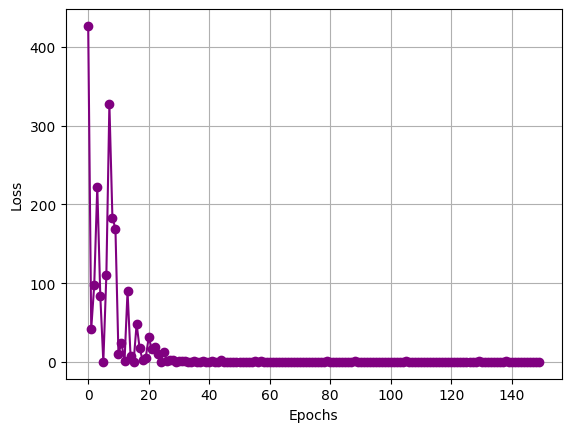

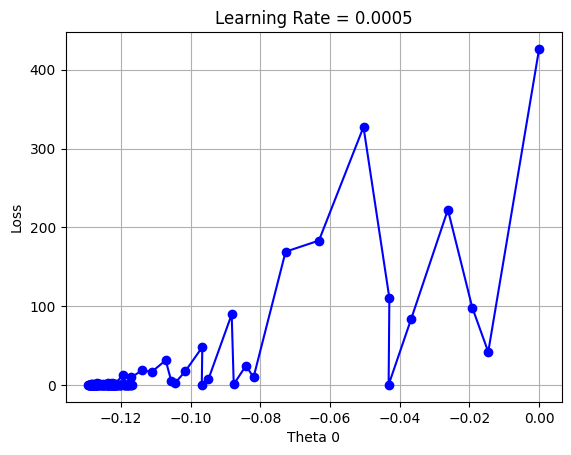

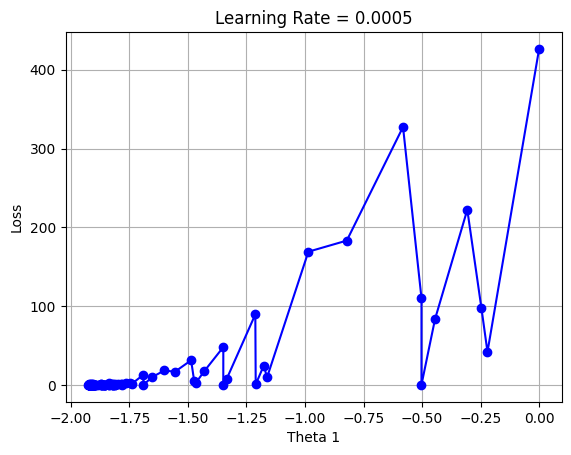

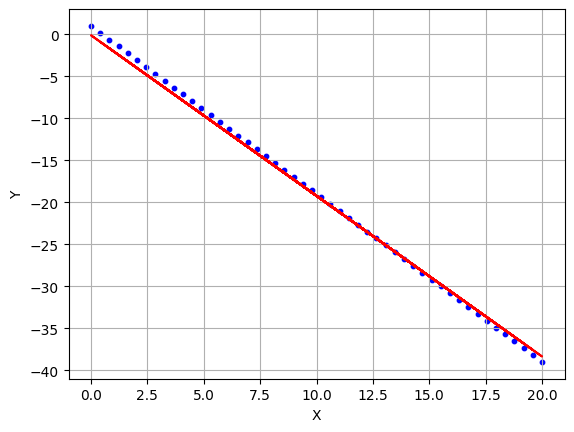

In [32]:
loss_plot(loss,'purple')
theta_plot(thetas_0,loss,0,'0.0005','b')
theta_plot(thetas_1,loss,1,'0.0005','b')
regression_line(x_shuffled,y_shuffled,h_xs,'b','r')

In [34]:
print("r2_score:",r2_score(y_shuffled,h_xs))

r2_score: 0.9976377310288631


## Mini-Batch GD

In [39]:
def single_variable_MGD(x,y,learning_rate,epochs,batch_size):
    np.random.seed(101)
    data = np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),axis=1)
    np.random.shuffle(data)
    x_shuffled = data[:,0]
    y_shuffled = data[:,1]
    thetas_0 = []
    thetas_1 = []
    loss = []
    h_xs = np.zeros(len(x_shuffled))

    theta_0 = 0
    theta_1 = 0
    batch_loss = []

    m = len(x_shuffled)
    print(m)
    for ep in range(epochs):
        for i in range(0,m,batch_size):
            h_x = theta_0 + theta_1 * x_shuffled[i:i+batch_size]
            error = h_x - y_shuffled[i:i+batch_size]
            j = 1/2 * np.sum(error**2) /len(x_shuffled[i:i+batch_size]) 
            thetas_0.append(theta_0) 
            thetas_1.append(theta_1)
            loss.append(j)
            d_theta_0 = np.sum(error) / len(x_shuffled[i:i+batch_size])
            d_theta_1 =  np.sum(error * x_shuffled[i:i+batch_size]) / len(x_shuffled[i:i+batch_size])
            gradient_vector = np.array([[d_theta_0],[d_theta_1]])
            theta_0_new = theta_0 - learning_rate * d_theta_0
            theta_1_new = theta_1 - learning_rate * d_theta_1
            theta_0 = theta_0_new
            theta_1 = theta_1_new
        h_xs = theta_0 + theta_1 * x_shuffled
        batch_loss.append(j)

        print("****************** Epoch ",ep,"******************")
        print("j =",j,"\n")
        print("Gradient Vector:\n",gradient_vector,"\n")
        print("Gradiant Vector Norm:\n",np.linalg.norm(gradient_vector),"\n")
        print("theta_0_new:",theta_0)
        print("theta_1_new:",theta_1)
        if np.linalg.norm(gradient_vector) < 0.001 or abs(batch_loss[ep]-batch_loss[ep-1]) < 0.001 and ep != 0:
            print("****************** Training Report ******************\n")
            print("Gradient Descent converged after ",ep," epochs\n")
            print("theta_0_Opt:",theta_0)
            print("theta_1_Opt:",theta_1,"\n")
            print("Cost = ",j,"\n")
            return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled
    return thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [40]:
thetas_0,thetas_1,loss,h_xs,theta_0,theta_1,h_x,x_shuffled,y_shuffled = single_variable_MGD(X,y,0.0005,300,5)

50
****************** Epoch  0 ******************
j = 28.749693808097824 

Gradient Vector:
 [[ 6.55556162]
 [60.7816351 ]] 

Gradiant Vector Norm:
 61.13413574891091 

theta_0_new: -0.06978924724113063
theta_1_new: -0.9693635987180408
****************** Epoch  1 ******************
j = 6.467967792096372 

Gradient Vector:
 [[ 2.96619847]
 [28.61439115]] 

Gradiant Vector Norm:
 28.767719999075442 

theta_0_new: -0.103504017832776
theta_1_new: -1.44799256525687
****************** Epoch  2 ******************
j = 1.3823105180838944 

Gradient Vector:
 [[ 1.19448224]
 [12.73525899]] 

Gradiant Vector Norm:
 12.791153559071402 

theta_0_new: -0.11940982177970424
theta_1_new: -1.6843464761632723
****************** Epoch  3 ******************
j = 0.312788377888108 

Gradient Vector:
 [[0.32013523]
 [4.89754198]] 

Gradiant Vector Norm:
 4.9079938882509655 

theta_0_new: -0.12652431396007574
theta_1_new: -1.8010894682190426
****************** Epoch  4 ******************
j = 0.1357652288994512 

In [41]:
print("r2_score:",r2_score(y_shuffled,h_xs))

r2_score: 0.9976565632956897


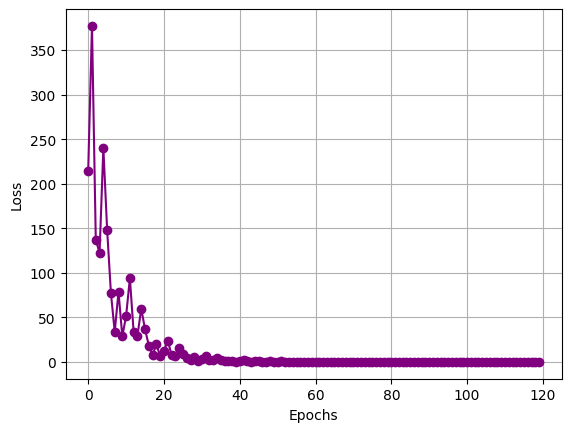

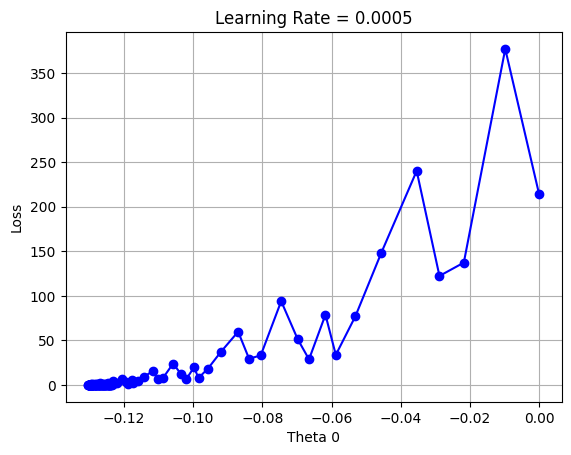

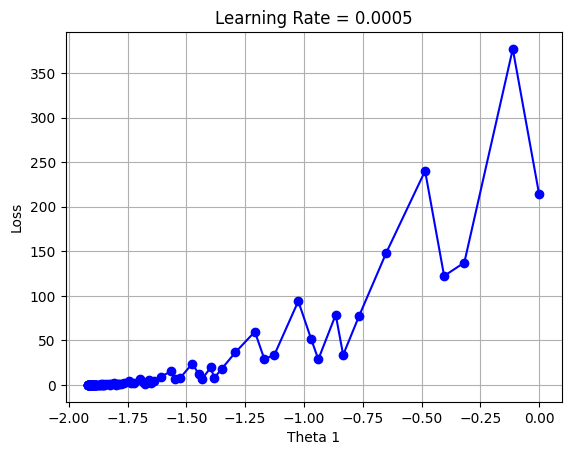

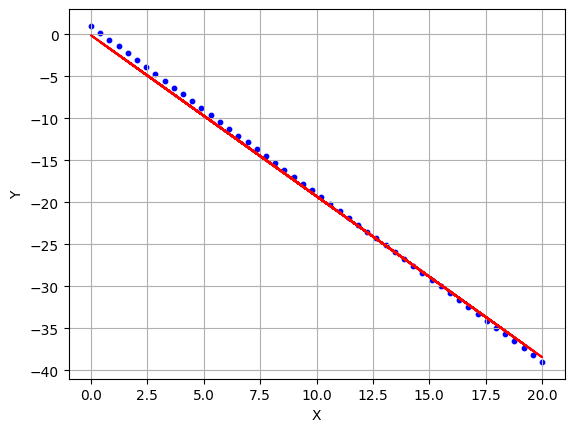

In [42]:
loss_plot(loss,'purple')
theta_plot(thetas_0,loss,0,'0.0005','b')
theta_plot(thetas_1,loss,1,'0.0005','b')
regression_line(x_shuffled,y_shuffled,h_xs,'b','r')